# Discrete Time Markov Processes (DTMC)

<a id='mc'></a>

Random processes are typically collections of *dependent* random variables, but allowing arbitrary associations between values at different points in time makes analysis intractable.  *Markov processes* are stochastic processes which obey a specific kind of "next step" dependence structure.  For a Markov process, roughly speaking, given the present, the future is conditionally independent of the past.  The dependence assumption in Markov chains allows for a rich
theory and tractable probabilistic models that have applications in a wide range of situations.

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

A **discrete time Markov chain** is a discrete time, discrete state random process which satisfies for all $n$:

Given $X_n$ ("the present"), $(X_{n+1}, X_{n+2}, \ldots)$ ("the future") is conditionally independent of $(X_{n-1}, X_{n-2}, \ldots, X_0)$ ("the past"). 

In Symbulate a discrete time Markov chain is defined with `MarkovChain`.  The probabilistic behavior of a discrete time Markov chain is fully specified by the following, which are the parameters of `MarkovChain`.

* `state_labels`: The **state space** of possible values of the process.  (Default is to label the states 0, 1, 2, ...)
* `initial_dist`: The **initial distribution**, which specifies the probability distribution at time 0
* `transition_matrix`: The (one-step) **transition probability matrix**, whose $(i, j)$  entry specifies the probability that the chain is in state $j$ at the next time step given that it is currently in state $i$: $P(X_{n+1} = j\, | X_n = i)$.  All rows sums must be 1.



*Example.* The weather in a certain city can be classified as either cloudy, rainy, or sunny and follows a discrete time Markov chain.
* Given that it is cloudy today, tomorrow it will be cloudy with probability 0.3, rainy with probability 0.2, or sunny with probability 0.5.
* Given that it is rainy today, tomorrow it will be cloudy with probability 0.5, rainy with probability 0.3, or sunny with probability 0.2.
* Given that it is sunny today, tomorrow it will be cloudy with probability 0.3, rainy with probability 0, or sunny with probability 0.7.

Suppose that it is sunny on Sunday.  (So we'll call Sunday $n=0$.)

In [2]:
states = ["cloud", "rain", "sun"]

TransitionMatrix = [[0.3, 0.2, 0.5],
                   [0.5, 0.3, 0.2],
                   [0.3, 0.0, 0.7]]

InitialDistribution = [0, 0, 1] # sunny on Sunday

X = MarkovChain(TransitionMatrix, InitialDistribution, states)

Find the probability that it is rainy on Friday ($n=5$).

In [3]:
X[5].sim(10000).tabulate(normalize = True)

cloud,0.3233
rain,0.0949
sun,0.5818
Total,1.0


Find the conditional probability that it is rainy on Friday given that it is rainy on Thursday.  (The following should return, approximately, the second row of the transition matrix.)

In [4]:
(X[5] | (X[4] == "rain")).sim(10000).tabulate(normalize = True)

cloud,0.5
rain,0.3028
sun,0.1972
Total,1.0


Find the conditional probability that it is rainy on Friday given that it is rainy on Thursday and cloudy on Wednesday.  (This demonstrates the Markov property: conditioning additionally on the value of $X_3$ does not change the conditional distribution from the previous part.)

In [5]:
(X[5] | ((X[4] == "rain") & (X[3] == "cloud"))).sim(10000).tabulate(normalize = True)

cloud,0.4981
rain,0.3043
sun,0.1976
Total,1.0


Find the probability that it is rainy on Friday and Saturday.

In [6]:
(X[5] & X[6]).sim(10000).tabulate(normalize = True)

"(cloud, cloud)",0.094
"(cloud, rain)",0.063
"(cloud, sun)",0.1602
"(rain, cloud)",0.0431
"(rain, rain)",0.0236
"(rain, sun)",0.0187
"(sun, cloud)",0.1829
"(sun, sun)",0.4145
Total,1.0


#### State labels

The state space can be any list of values (like ['cloud', 'rain', 'sun']).  If `state_labels` are not specified, the default is to label the states 0, 1, 2, ...  When the states are numerical values, plots can be created, and methods like `.mean()` and `.sd()` can be applied.

In [7]:
TransitionMatrix = [[0.3, 0.2, 0.5],
                   [0.5, 0.3, 0.2],
                   [0.3, 0.0, 0.7]]

InitialDistribution = [0, 0, 1] # sunny on Sunday

X = MarkovChain(TransitionMatrix, InitialDistribution)

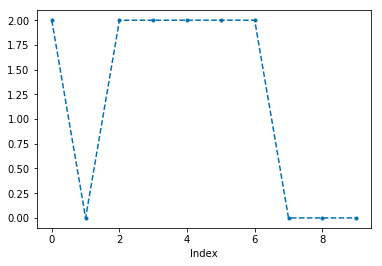

In [8]:
X.sim(1).plot(alpha = 1)

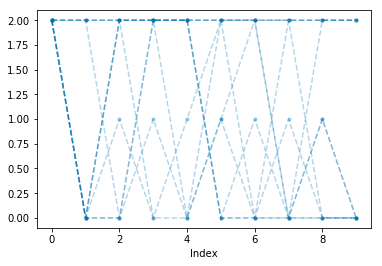

In [9]:
X.sim(10).plot()

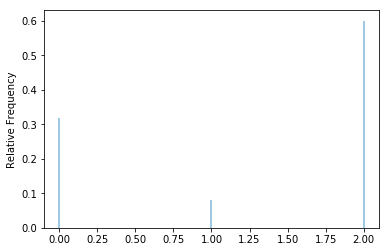

In [10]:
X[5].sim(10000).plot()

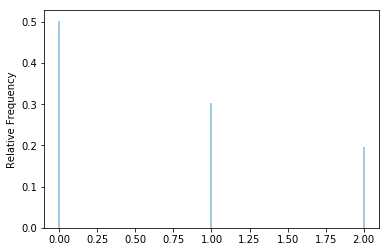

In [11]:
(X[5] | (X[4] == 1) ).sim(10000).plot()

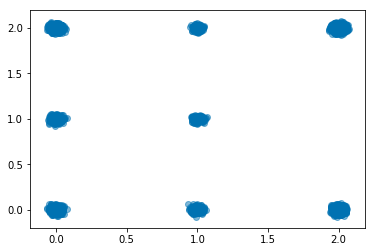

In [12]:
(X[4] & X[5]).sim(10000).plot(jitter = True)